V true is: [137.21513095  82.07260169 146.92461285 146.92461285 154.9853148
 155.16851257 162.31322566 162.22162678 168.26715324]
h dot is: [ 5.53833333  6.93666667 11.075       3.16833333  8.50833333  6.235
 11.77666667  4.01833333  2.77      ]
\landa is: [0.04037338 0.08461961 0.07545036 0.02156602 0.05492529 0.04019294
 0.072619   0.02477317 0.01646266]
lift coefficient: [0.94276348 2.59570711 0.82215792 0.81113563 0.7346069  0.71741386
 0.66830323 0.65203532 0.616528  ]
drag coefficient: [0.03808324 0.2201735  0.06215009 0.01749568 0.04038912 0.02885051
 0.048617   0.01615629 0.01015061]
L/D: [24.75533828 11.78937108 13.22858764 46.36205598 18.18823836 24.86659089
 13.7462864  40.35798859 60.73803319]


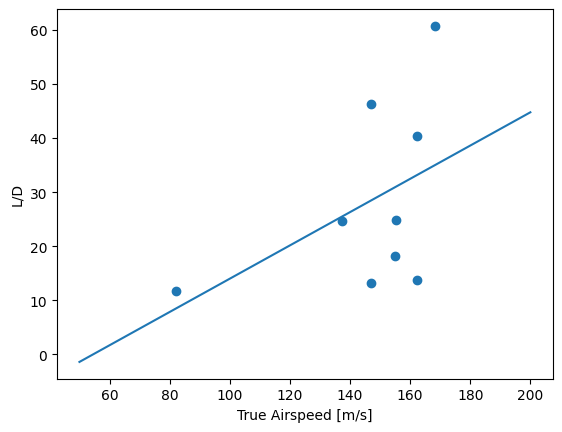

In [35]:
import numpy
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

s = 177.6
sigma = 0.85
v = [74.9, 44.8, 80.2, 80.2, 84.6, 84.7, 88.6, 88.55, 91.85]
v_true = v[:9]/np.sqrt(sigma)*(1.689) # Modify v_true to have length 9

print("V true is:", v_true)

hdt = [332.3, 416.2, 664.5, 190.1, 510.5, 374.1, 706.6, 241.1, 166.2]
hdt = np.array(hdt)
h_dot = hdt/60

print("h dot is:", h_dot)

sinlanda = h_dot/v_true
landa = np.arcsin(sinlanda)
coslanda=np.cos(landa)
print("\landa is:", landa)

w=[3027.9,3027.9,3015.2,3015.2,3002.5,3002.5,2989.7,2989.7,2977]
rho=np.array([0.00191941,0.00194321,0.00190775,0.00193874,0.00191328,0.00195588,0.00190716,0.00196152,0.00192024])

wlanda1=np.multiply(w,coslanda)
wlanda2=np.multiply(w,sinlanda)
cl = (2*wlanda1)/(rho*s*(v_true**2))
cd = (2*wlanda2)/(rho*s*(v_true**2))

print("lift coefficient:", cl)
print("drag coefficient:", cd)

print("L/D:",cl/cd)
LD=cl/cd



mymodel = numpy.poly1d(numpy.polyfit(v_true,LD,1))
myline = numpy.linspace(50,200, 100)
plt.scatter(v_true,LD)
plt.plot(myline, mymodel(myline))
plt.xlabel('True Airspeed [m/s]')
plt.ylabel('L/D')
plt.show()




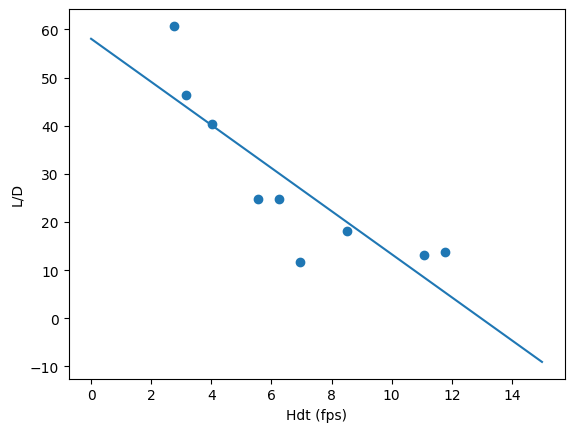

In [38]:
mymodel = numpy.poly1d(numpy.polyfit(h_dot,LD,1))
myline = numpy.linspace(0,15, 100)
plt.scatter(h_dot,LD)
plt.plot(myline, mymodel(myline))
plt.xlabel('Hdt (fps)')
plt.ylabel('L/D')
plt.show()

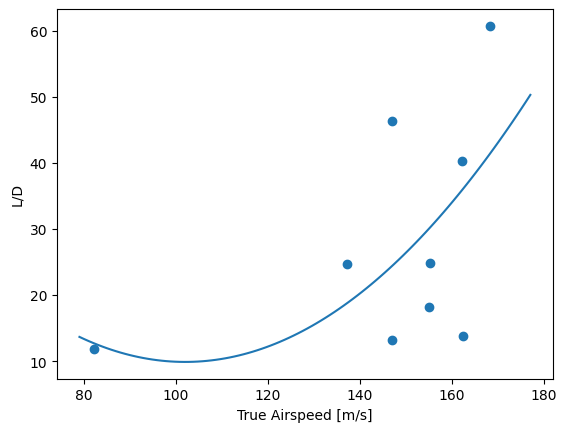

In [43]:
mymodel = numpy.poly1d(numpy.polyfit(v_true,LD,2))
myline = numpy.linspace(79,177, 100)
plt.scatter(v_true,LD)
plt.plot(myline, mymodel(myline))
plt.xlabel('True Airspeed [m/s]')
plt.ylabel('L/D')
plt.show()

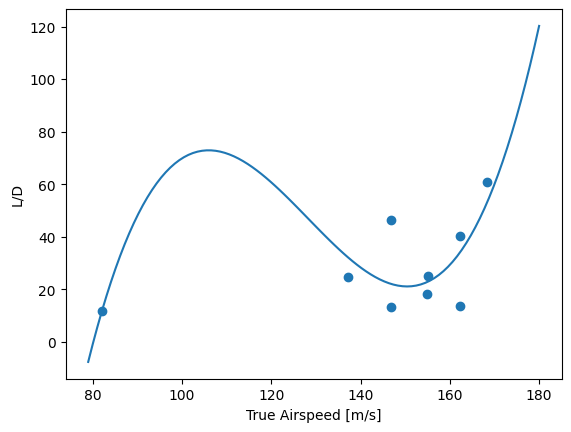

In [42]:
mymodel = numpy.poly1d(numpy.polyfit(v_true,LD,3))
myline = numpy.linspace(79,180, 100)
plt.scatter(v_true,LD)
plt.plot(myline, mymodel(myline))
plt.xlabel('True Airspeed [m/s]')
plt.ylabel('L/D')
plt.show()